In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization 
import warnings # import warnings to ignore warnings
warnings.filterwarnings('ignore') # warnings, to be disabled

In [2]:
df=sns.load_dataset('tips') # load dataset
df.head() # display first 5 rows of dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
print(df.isnull().sum()) # check for null values
df=df.dropna() # drop null values
df=df.drop_duplicates() # drop duplicate values
df.info() # display information about dataset

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [5]:
df.query('tip<2 and total_bill>10').head() # query data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2


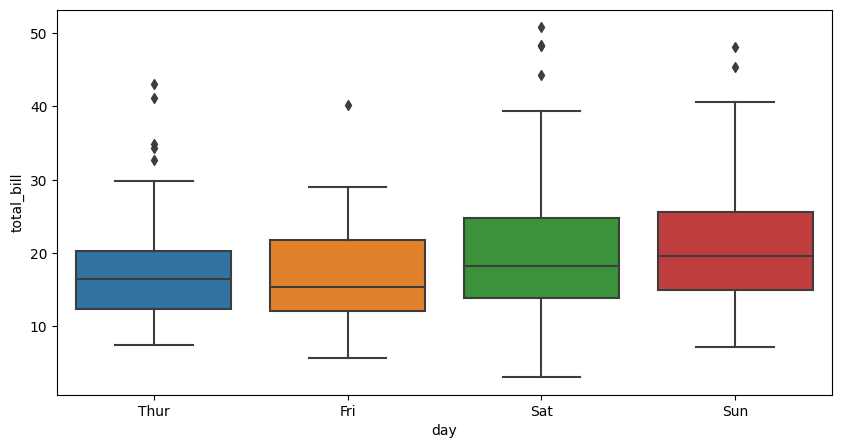

In [6]:
fig=plt.figure(figsize=(10,5)) # create figure
sns.boxplot(x='day',y='total_bill',data=df) # create boxplot
plt.show() # display plot

In [7]:
df.fillna(df.mean(),inplace=True) # fill null values with mean
df.head() # display first 5 rows of dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
from scipy import stats # import stats from scipy
z=np.abs(stats.zscore(df['total_bill'])) # calculate z-score
print(z.head()) # display first 5 rows of z-score

0    0.317584
1    1.065471
2    0.134522
3    0.434801
4    0.537144
Name: total_bill, dtype: float64


In [10]:
df=df[(z<3)] # remove outliers

In [11]:
# outlier detection using IQR
Q1=df['total_bill'].quantile(0.25) # calculate first quartile
Q3=df['total_bill'].quantile(0.75) # calculate third quartile
IQR=Q3-Q1 # calculate IQR

In [12]:
df=df[(df['total_bill']>(Q1-1.5*IQR)) & (df['total_bill']<(Q3+1.5*IQR))] # remove outliers

<Figure size 1000x500 with 0 Axes>

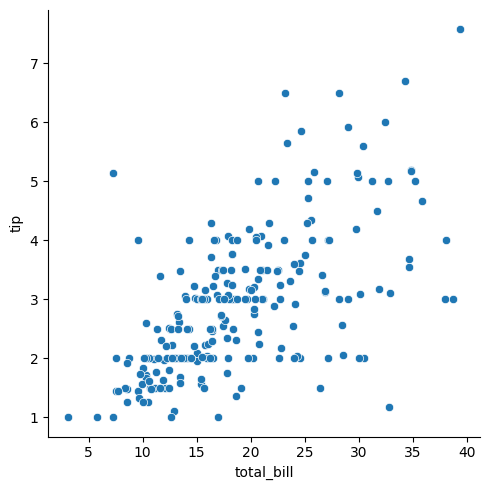

In [13]:
plt.figure(figsize=(10,5)) # create figure
sns.relplot(x='total_bill',y='tip',data=df) # create scatter plot
plt.show() # display plot

In [14]:
import plotly.express as px # import plotly

In [17]:
total_bill_above_20=df[df['total_bill']>20] # filter data
fig = px.histogram(total_bill_above_20, x='total_bill', nbins=30, title='Total Bill > $20', opacity=0.8, color_discrete_sequence=['indianred']) # create histogram
fig.show() # display plot

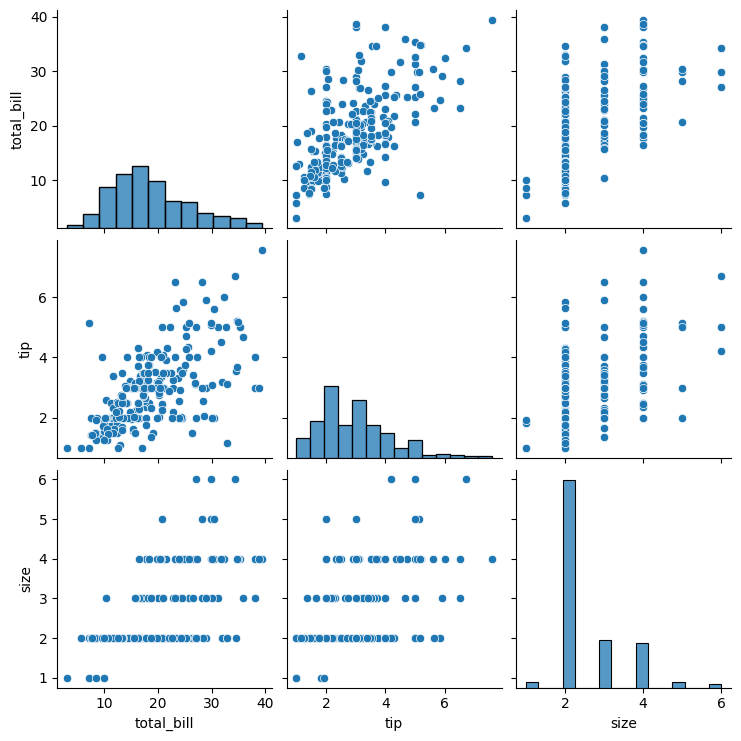

In [18]:
sns.pairplot(df) # create pairplot
plt.show() # display plot

<Axes: >

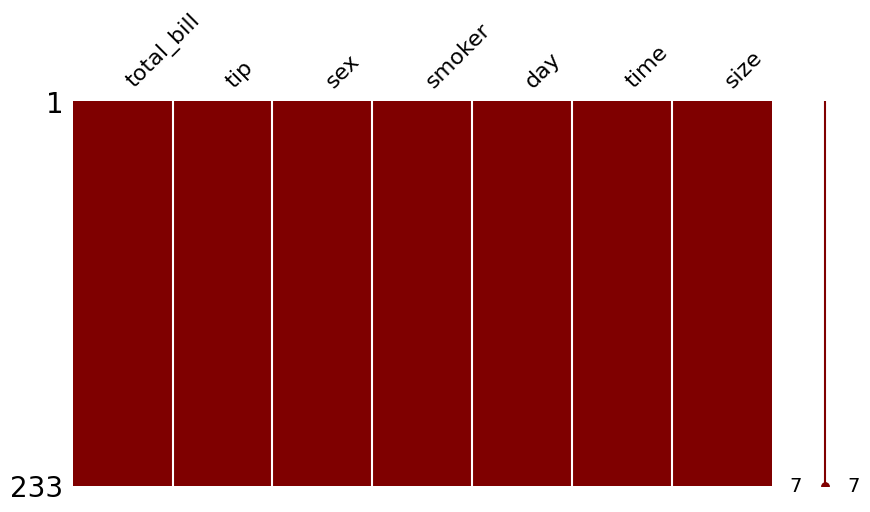

In [20]:
import missingno as msno # import missingno
msno.matrix(df,figsize=(10,5),color=(0.5,0,0)) # create matrix

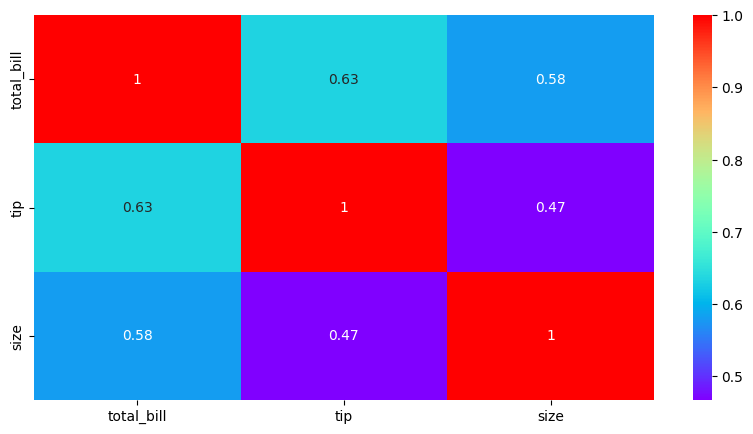

In [21]:
corr=df.corr(method='pearson') # calculate correlation
plt.figure(figsize=(10,5)) # create figure
sns.heatmap(corr,annot=True,cmap='rainbow') # create heatmap
plt.show() # display plot